# Projet Python

## Importation des librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from tabulate import tabulate

## Construction du dataset

In [2]:
# Liste des features
with open('features.txt', 'r') as f:
    features = f.read().replace(" ", "").splitlines()

# On renomme les colonnes en triple
for i in range (0, len(features)-2):
    if features[i] == features[i+1]:
        features[i+1] = features[i+1][:-1]+"2"
        features[i+2] = features[i+2][:-1]+"3"
    elif features[i] == features[i+2]:
        features[i+2] = features[i+2][:-1]+"2"
        features[i+4] = features[i+4][:-1]+"3"

# Liste des activités pour la partie train
with open('y_train.txt', 'r') as f:
    y_train = f.read().splitlines()

# Liste des activités pour la partie test
with open('y_test.txt', 'r') as f:
    y_test = f.read().splitlines()

# Liste des sujets pour la partie train
with open('subject_id_train.txt', 'r') as f:
    subject_id_train = f.read().splitlines()

# Liste des sujets pour la partie test
with open('subject_id_test.txt', 'r') as f:
    subject_id_test = f.read().splitlines()
    
# Liste des noms des activités
labels = []
with open('activity_labels.txt', 'r') as f:
    for line in f:
        line = line.split()
        labels.append(line[1])

# On remplace le numéro des activités par leur nom
for i in range(len(y_train)):
    y_train[i] = labels[int(y_train[i])-1]
for i in range(len(y_test)):
    y_test[i] = labels[int(y_test[i])-1]

# Construction du DataFrame pour la partie train
x_train = pd.read_csv('X_train.txt', sep=" ", header=None)
x_train.columns = features
x_train['subject-id'] = subject_id_train

# Construction du DataFrame pour la partie test
x_test = pd.read_csv('X_test.txt', sep=" ", header=None)
x_test.columns = features
x_test['subject-id'] = subject_id_test

In [3]:
# On affiche le dataset train
x_train

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1,subject-id
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718,1
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436,1
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271,1
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826,1
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7762,0.048048,-0.042445,-0.065884,-0.195448,-0.278326,-0.219954,-0.282233,-0.305861,-0.357803,0.267874,...,-0.596760,-0.879026,-0.190437,0.829718,0.206972,-0.425619,-0.792292,0.238580,0.056020,30
7763,0.037639,0.006430,-0.044345,-0.235372,-0.302680,-0.232843,-0.322483,-0.354464,-0.345592,0.181271,...,-0.404418,-0.684496,0.064907,0.875679,-0.879033,0.400219,-0.772288,0.252653,0.056252,30
7764,0.037451,-0.002724,0.021009,-0.218281,-0.378082,-0.076950,-0.304446,-0.400661,-0.193071,0.113141,...,0.000207,-0.317314,0.052806,-0.266724,0.864404,0.701169,-0.779566,0.249121,0.047071,30
7765,0.044011,-0.004536,-0.051242,-0.219202,-0.383350,-0.081035,-0.310419,-0.380233,-0.201007,0.166671,...,0.037919,-0.356579,-0.101360,0.700740,0.936674,-0.589479,-0.785603,0.246409,0.031700,30


## Exploration des données

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2CB06100>,
      dtype=object)

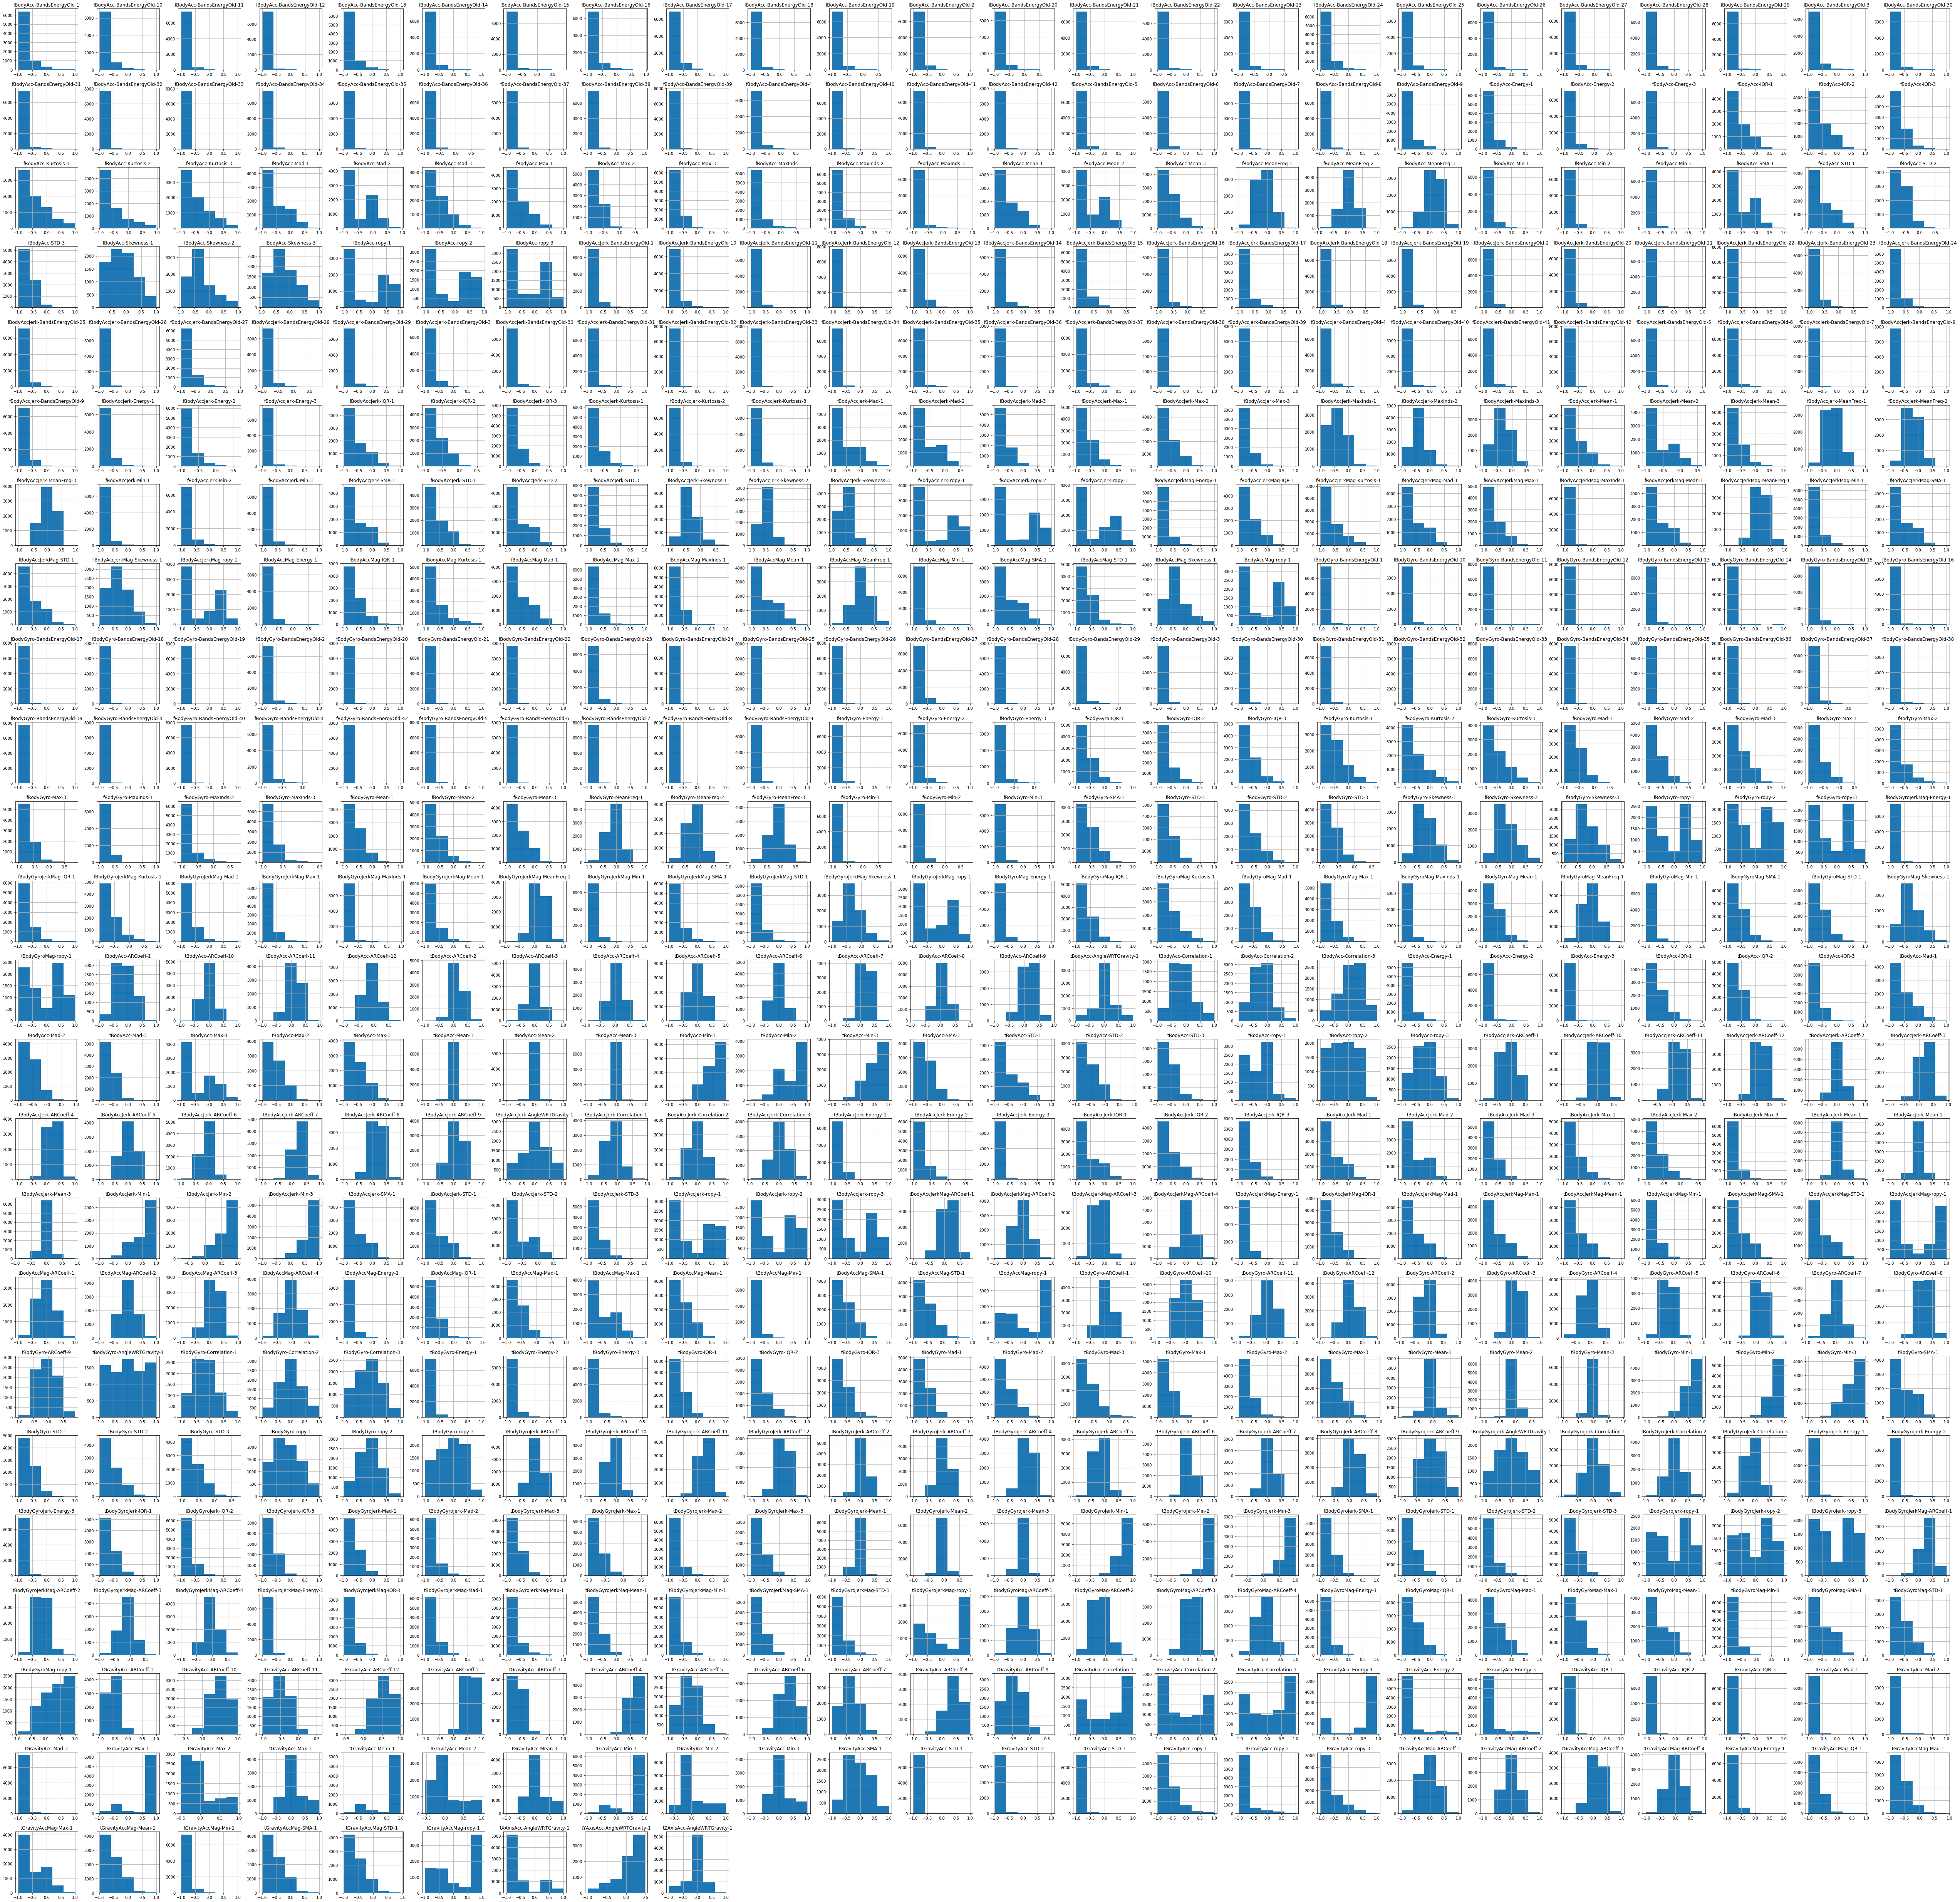

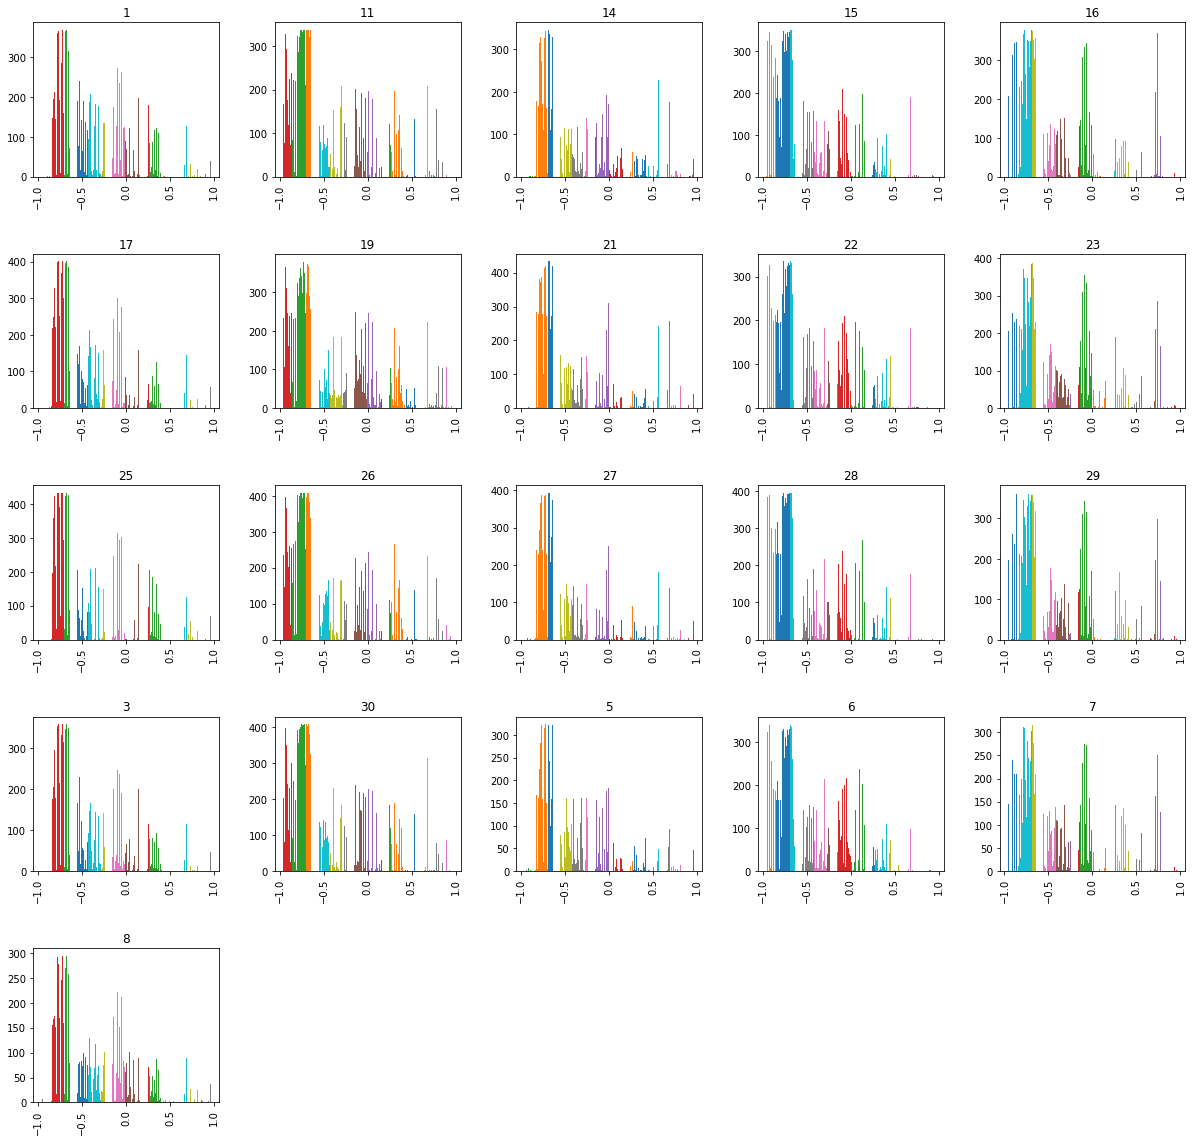

In [4]:
# Histogramme des fréquences de toutes les features (zoomer pour voir les graphiques en détail)
x_train.hist(bins=5, figsize=(90, 90))

# On groupe par ID des sujets
x_train.hist(bins=5, by='subject-id', figsize=(20, 20))

In [5]:
# Matrice de corrélation
x_train.corr()

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
tBodyAcc-Mean-1,1.000000,-0.635967,-0.630025,0.023420,-0.020698,-0.045023,0.030579,-0.024288,-0.049180,0.147468,...,0.008851,-0.019793,-0.017768,-0.132641,0.026053,-0.053429,0.030064,0.124145,-0.098704,-0.079874
tBodyAcc-Mean-2,-0.635967,1.000000,0.472460,-0.022666,0.043462,0.065096,-0.024190,0.052732,0.075577,-0.112580,...,-0.018214,0.013575,0.010830,0.047590,0.021639,0.072296,0.029428,-0.088592,0.080304,0.043551
tBodyAcc-Mean-3,-0.630025,0.472460,1.000000,-0.013337,0.046654,0.069783,-0.014879,0.055531,0.080151,-0.099253,...,-0.009945,0.024812,0.022980,0.027744,0.001779,0.016080,-0.018802,-0.079965,0.042147,0.073170
tBodyAcc-STD-1,0.023420,-0.022666,-0.013337,1.000000,0.879795,0.804476,0.998320,0.858936,0.784682,0.968917,...,-0.065772,0.138397,0.105513,-0.022767,-0.007824,0.014518,-0.022963,-0.339444,0.422214,0.363769
tBodyAcc-STD-2,-0.020698,0.043462,0.046654,0.879795,1.000000,0.873746,0.875431,0.996065,0.867446,0.848091,...,-0.140058,0.196562,0.164964,0.020252,0.030832,-0.002586,-0.005665,-0.328960,0.423689,0.369203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tBodyGyro-AngleWRTGravity-1,-0.053429,0.072296,0.016080,0.014518,-0.002586,-0.012959,0.014408,-0.004658,-0.016988,0.013410,...,-0.026655,0.037426,0.027539,-0.007927,0.010781,1.000000,-0.115076,-0.022708,0.003139,-0.009774
tBodyGyroJerk-AngleWRTGravity-1,0.030064,0.029428,-0.018802,-0.022963,-0.005665,0.000035,-0.022722,-0.001583,0.000626,-0.025747,...,-0.002348,-0.010313,-0.009147,-0.017277,0.025000,-0.115076,1.000000,0.026446,-0.007795,-0.005032
tXAxisAcc-AngleWRTGravity-1,0.124145,-0.088592,-0.079965,-0.339444,-0.328960,-0.298680,-0.332691,-0.317816,-0.291831,-0.344166,...,0.087845,-0.079524,-0.071166,0.023298,0.037000,-0.022708,0.026446,1.000000,-0.783715,-0.645989
tYAxisAcc-AngleWRTGravity-1,-0.098704,0.080304,0.042147,0.422214,0.423689,0.385133,0.413780,0.411093,0.372595,0.431880,...,-0.085890,0.072599,0.062872,-0.019241,-0.042355,0.003139,-0.007795,-0.783715,1.000000,0.591166


## Entraînement

### Régression linéaire

In [6]:
LR = LogisticRegression()

# Définition des hyperparamètres
param_grid = {
    'penalty': ['l1', 'l2'],
    'C':[0.001, 0.01, 0.1, 1, 5, 10],
    'solver': ['lbfgs', 'liblinear', 'saga']
}

# On utilise un objet grid search pour faire du model tunig.
clf_lr = GridSearchCV(LR, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)

# Entraînement
best_clf = clf_lr.fit(x_train, y_train)
res = best_clf.predict(x_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  5.9min finished


0.9411764705882353


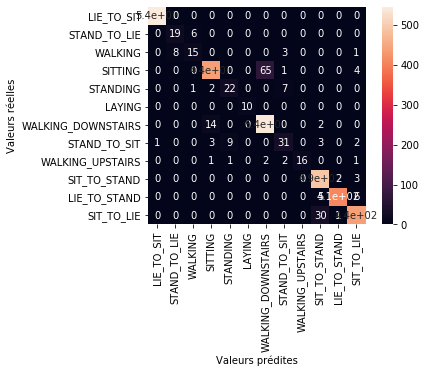

In [7]:
# Précision
print(best_clf.score(x_test, y_test))
# Matrice de confusion
sn.heatmap(confusion_matrix(y_test, res), square=True, annot=True, xticklabels=set(y_train), yticklabels=set(y_train))
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles');

### SVM

In [8]:
SVM = svm.SVC()

# Définition des hyperparamètres
param_grid = {
    'C':[0.001, 0.01, 0.1, 1, 5, 10],
    'gamma': [0.0001, 0.001, 0.01, 0.1],
    'kernel': ['linear']
}

# On utilise un objet grid search pour faire du model tunig.
clf_svm = GridSearchCV(SVM, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)

# Entraînement
best_clf = clf_svm.fit(x_train, y_train)
res = best_clf.predict(x_test)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  2.6min finished


0.9490828589500316


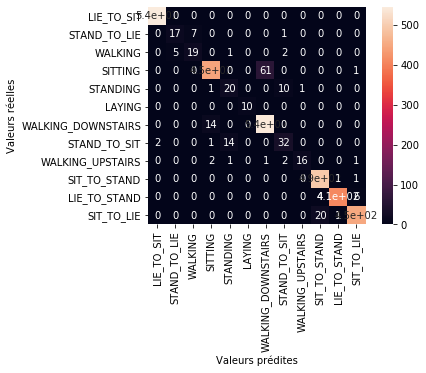

In [9]:
# Précision
print(best_clf.score(x_test, y_test))
# Matrice de confusion
sn.heatmap(confusion_matrix(y_test, res), square=True, annot=True, xticklabels=set(y_train), yticklabels=set(y_train))
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles');

###  Random Forest

In [ ]:
RF = RandomForestClassifier()

# Définition des hyperparamètres
param_grid = { 
    'n_estimators': [100, 200, 500, 800],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10, 20, 50, 80, 100],
}
# On utilise un objet grid search pour faire du model tunig.
clf_rf = GridSearchCV(RF, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)

# Entraînement
best_clf = clf_rf.fit(x_train, y_train)
res = best_clf.predict(x_test)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 11.5min


In [ ]:
# Précision
print(best_clf.score(x_test, y_test))
# Matrice de confusion
sn.heatmap(confusion_matrix(y_test, res), square=True, annot=True, xticklabels=set(y_train), yticklabels=set(y_train))
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles');

### MLP

In [ ]:
MLP = MLPClassifier()

# Définition des hyperparamètres
param_grid = { 
    'hidden_layer_sizes': [(1,), (50,)],
    'activation': ['tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.0005, 0.001],
    'learning_rate': ['constant','adaptive'],
}
# On utilise un objet grid search pour faire du model tunig.
clf_mlp = GridSearchCV(MLP, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)

# Entraînement
best_clf = clf_mlp.fit(x_train, y_train)
res = best_clf.predict(x_test)

In [ ]:
# Précision
print(best_clf.score(x_test, y_test))
# Matrice de confusion
sn.heatmap(confusion_matrix(y_test, res), square=True, annot=True, xticklabels=set(y_train), yticklabels=set(y_train))
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles');

## Sauvegarde du meilleur modèle

In [ ]:
with open('model.pkl', 'wb') as file:
    pickle.dump(clf_svm, file)

## Chargement du modèle

In [ ]:
with open('model.pkl', 'rb') as file:
    pickle_model = pickle.load(file)

# On revérifie la précision
print(pickle_model.score(x_test, y_test))

## Création du fichier de test pour l'API

In [ ]:
x_test.sample(10).to_json('./x_test.json', orient = "records")